[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/akshayrb22/playing-with-data/blob/master/data_analysis/boston_house_pricing_analysis/boston_housing_data_analysis.ipynb)

Import the necessary libraries to analyze the data. Here we will make use of pandas and numpy.
<br>We have also imported the Boston house pricing dataset from sklearn using ```load_boston```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.datasets import load_boston

# Basic Statistical Data Analysis

Here, we will display the description of the Boston House Pricing Dataset which gives an accurate summary of the data entiled in this dataset. It is done by the ```DESCR``` property of the ```boston``` dataset which is present in ```sklearn.datasets```.

In [2]:
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(boston.data, columns=[boston.feature_names])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
print(df.shape)
print(df.columns)

(506, 13)
MultiIndex(levels=[['AGE', 'B', 'CHAS', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'RM', 'TAX', 'ZN']],
           labels=[[3, 12, 5, 2, 7, 10, 0, 4, 9, 11, 8, 1, 6]])


The ```describe()``` method in pandas enables us to view 8 prominent statistical characteristics about the data we are analyzing. These are: </br>
* count -> number of rows of data for each column
* mean -> ${\sum_{n=1}^{count} \frac{value_{n}}{count}}$ 
* std -> the standard deviation of each column of data
* min -> the minimum value of the column
* 25% -> the first quartile i.e. for a dataset the number for which 25% of the data is less than that number
* 50% -> the second quartile i.e. for a dataset the number for which 50% of the data is less than that number
* 75% -> the third quartile i.e. for a dataset the number for which 50% of the data is less than that number
* max -> the maximum value in the column


In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


```df.index``` gives the range of indices between whcih the values in your dataset lies.

In [6]:
df.index

RangeIndex(start=0, stop=506, step=1)

Calculating the mean, max and min of ```'CRIM'``` - per capita crime rate per town

In [7]:
print("Mean = {0}".format(df['CRIM'].mean()))
print("Max = {0}".format(df['CRIM'].max()))
print("Min = {0}".format(df['CRIM'].min()))

Mean = CRIM    3.613524
dtype: float64
Max = CRIM    88.9762
dtype: float64
Min = CRIM    0.00632
dtype: float64


```df.iloc``` is used for integer based indexing and selection. It can also be used for integer based slicing. In this cell, I haven't specified any one feature in particular. I have taken the 10th to the 20th value.

In [8]:
df.iloc[10:20]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
11,0.11747,12.5,7.87,0.0,0.524,6.009,82.9,6.2267,5.0,311.0,15.2,396.90,13.27
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,311.0,15.2,390.50,15.71
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,307.0,21.0,396.90,8.26
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
15,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
17,0.78420,0.0,8.14,0.0,0.538,5.990,81.7,4.2579,4.0,307.0,21.0,386.75,14.67
18,0.80271,0.0,8.14,0.0,0.538,5.456,36.6,3.7965,4.0,307.0,21.0,288.99,11.69
19,0.72580,0.0,8.14,0.0,0.538,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28


```df.iloc[:, 3]``` gives the ```'CHAS'``` feature values for all the datapoints in this dataset.

In [9]:
df.iloc[:, 3]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
476    0.0
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
500    0.0
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: (CHAS,), Length: 506, dtype: float64

We can also specify the features that we want to view. In this case the 4th through 6th feature not including the 6th can be viewed.

In [10]:
df.iloc[10:20, 4:6]

,NOX,RM
10,0.524,6.377
11,0.524,6.009
12,0.524,5.889
13,0.538,5.949
14,0.538,6.096
15,0.538,5.834
16,0.538,5.935
17,0.538,5.990
18,0.538,5.456
19,0.538,5.727


Now, if we want to get the count of the different types of variables we have in the data for a particular feature, we can make use of the ```value_counts()``` method.
<br>As you can see, it is best used if we have discrete values to help categorize, like ```'CHAS'``` - the Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

In [11]:
df.iloc[:, 3].value_counts()

0.0    471
1.0     35
Name: (CHAS,), dtype: int64

Note: **This works only for```pandas.DataFrame```objects.** It doesn't work for ```pandas.Series``` objects.

# Basic Data Visualization
Now, let's get into data visualization and have a graphical view on how our data looks.

## Histograms
Histograms are one of the basic ways one can view the distributions in numerical data. Here, the data is distibuted into class intervals. These class intervals can be thought of as bins of equal value ranges. 

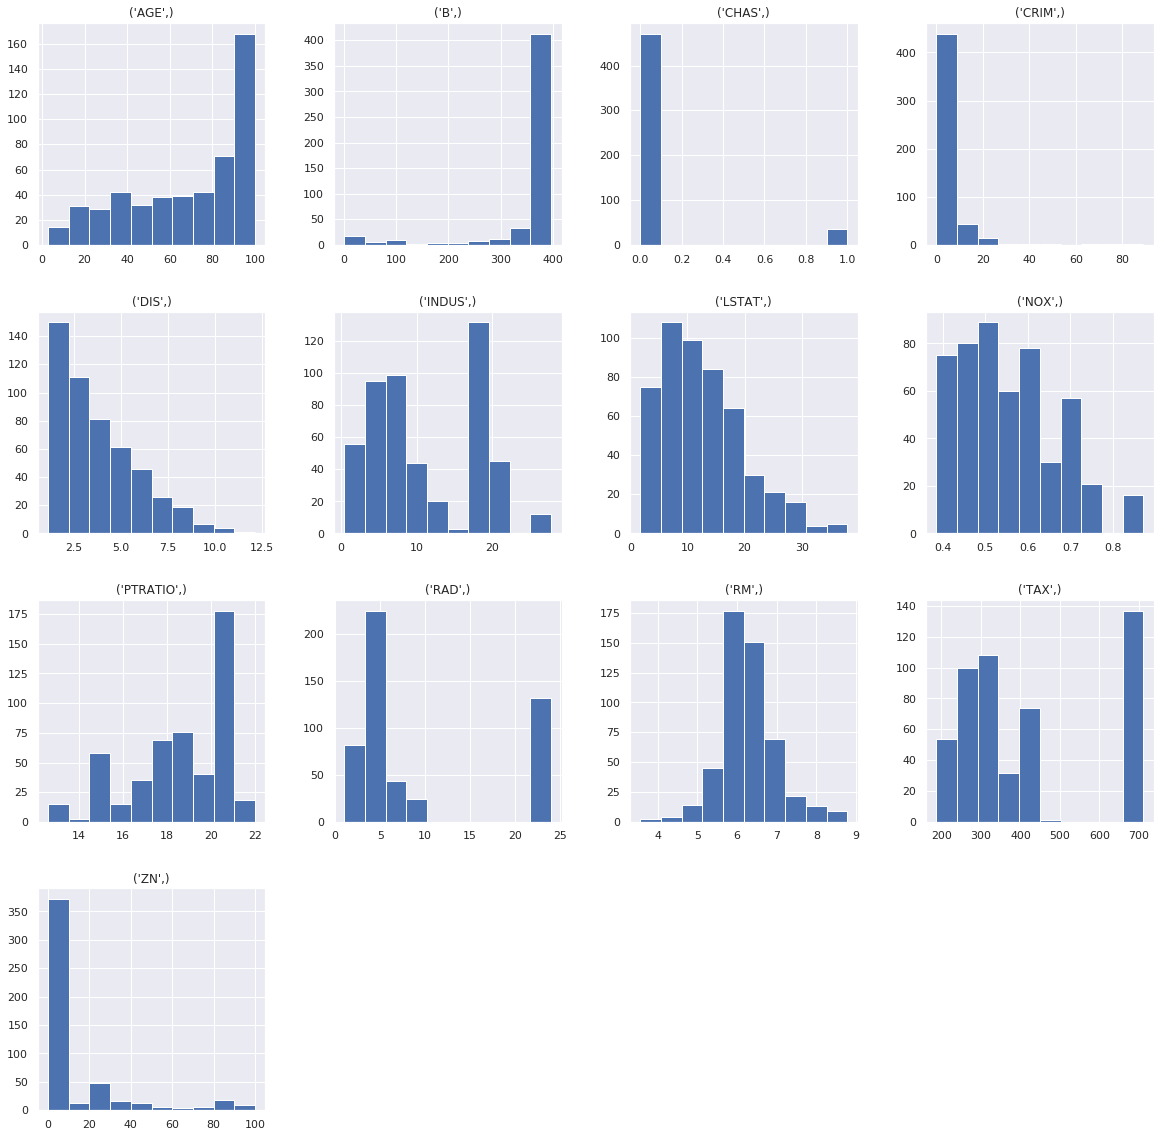

In [12]:
features = boston.feature_names
df[features].hist(figsize=(20, 20))

## Density Plots
For a smoother version of the same data, we can have density plots. The key aspect on which a density plot differs from a histogram is the fact that density plots visualize the data over a continuous interval as compared to a fixed interval.

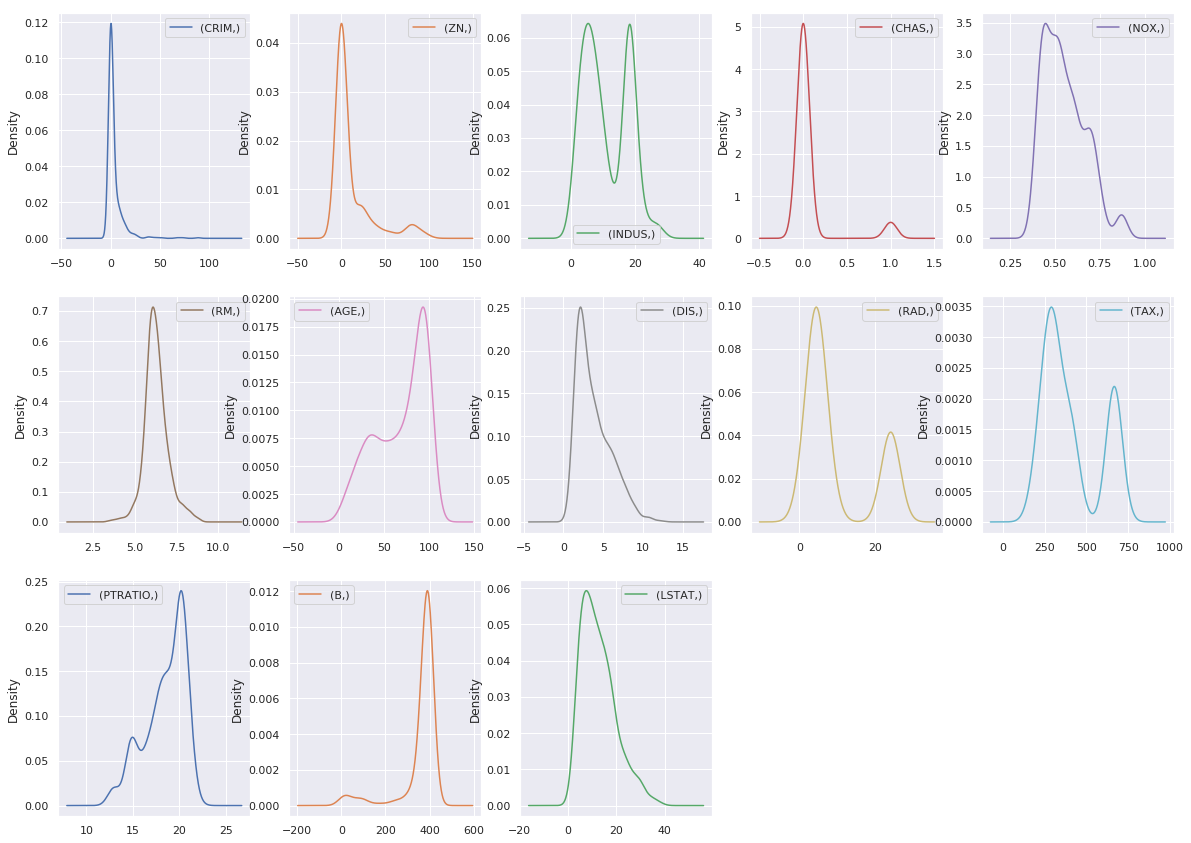

In [13]:
df[features].plot(
    kind='density',
    subplots=True,
    layout=(4, 5),
    sharex=False,
    figsize=(20, 20))

## Box Plots
With these type of plots, we can depict the interquartile data of a particular dataset. We can clearly view the 25%, 50% and 75% points of the dataset and finally we also get a view of the outliers in the particular dataset.
<br>
### First Quartile
A quick Google search says that the first quartile is the middle number between the lowest value in a dataset and the median value in the dataset.
<br>
### Second Quartile
The median of the data.
<br>
### Third Quartile
Symmetrical to the first quartile, it is the middle value between the median value and the largest value in a particular dataset.
### Interquartile Range
This is the box in the boxplot. It is the 50% of the data i.e. from the the first quartile to the third quartile.
### Whiskers
The whiskers i.e. the two parallel lines indicate the points that fall between the interquartile range.

Now, let us plot a boxplot for the weighted distances to 5 employment centres in various parts of Boston city. Or you can check out the various other attrivutes in the dataset and try them out. Change the ```x``` variable to the column name in the method prameters.
<br>[Basic Statistical Data Analysis](#Basic-Statistical-Data-Analysis)

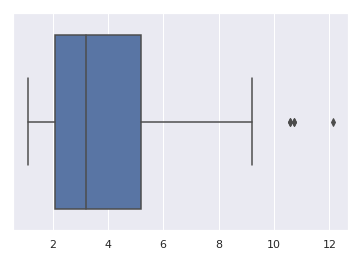

In [14]:
sns.boxplot(x='DIS', data=df)

As we can see, there are a few outliers in the dataset. These values are the ones on the edge of the graph. We can also see that the median is not at the exact middle of the box.

## Correlation Matrices
A correlation matrix is a matrix which shows how related any two particular attributes in a dataset is. We can plot a heat map which shows how much two variables are related to each other. But a necessary prerequisite to this is that **the data must be numerical in nature**. 
<br>With the Boston Housing dataset, we do not have any other type of values. All the attributes are numerical values which makes it easier to create a heatap of the correlation matrix that we create. In other cases, we can drop the other types  of data or convert them to a numerical type if possible.

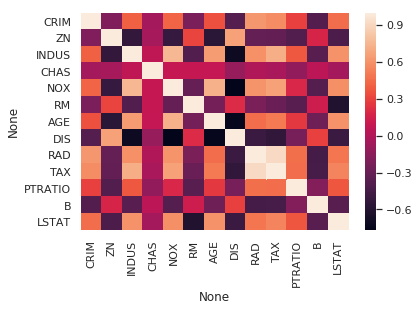

In [15]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix)

The scale on the right indicates the severity of correlation or **how related the attributes are**. Quite obviously, it is highest across the diagonal. But most of the values are not related and we can see that in the darker areas of the heatmap.
<br>A simple example of how correlated two different data points are is the plot between the ```TAX``` value and the ```INDUS``` value. It shows that the ```proportion of non-retail business acres per town``` is in some way related to the ```full-value property-tax rate per $10,000```

## Pairplots
Another way of looking at the relation between different attributes is **pairplots**. Esentially, a pairplot will give us a quick visual analysis of all the attributes. **And the best part is that it is just with one line of code!**

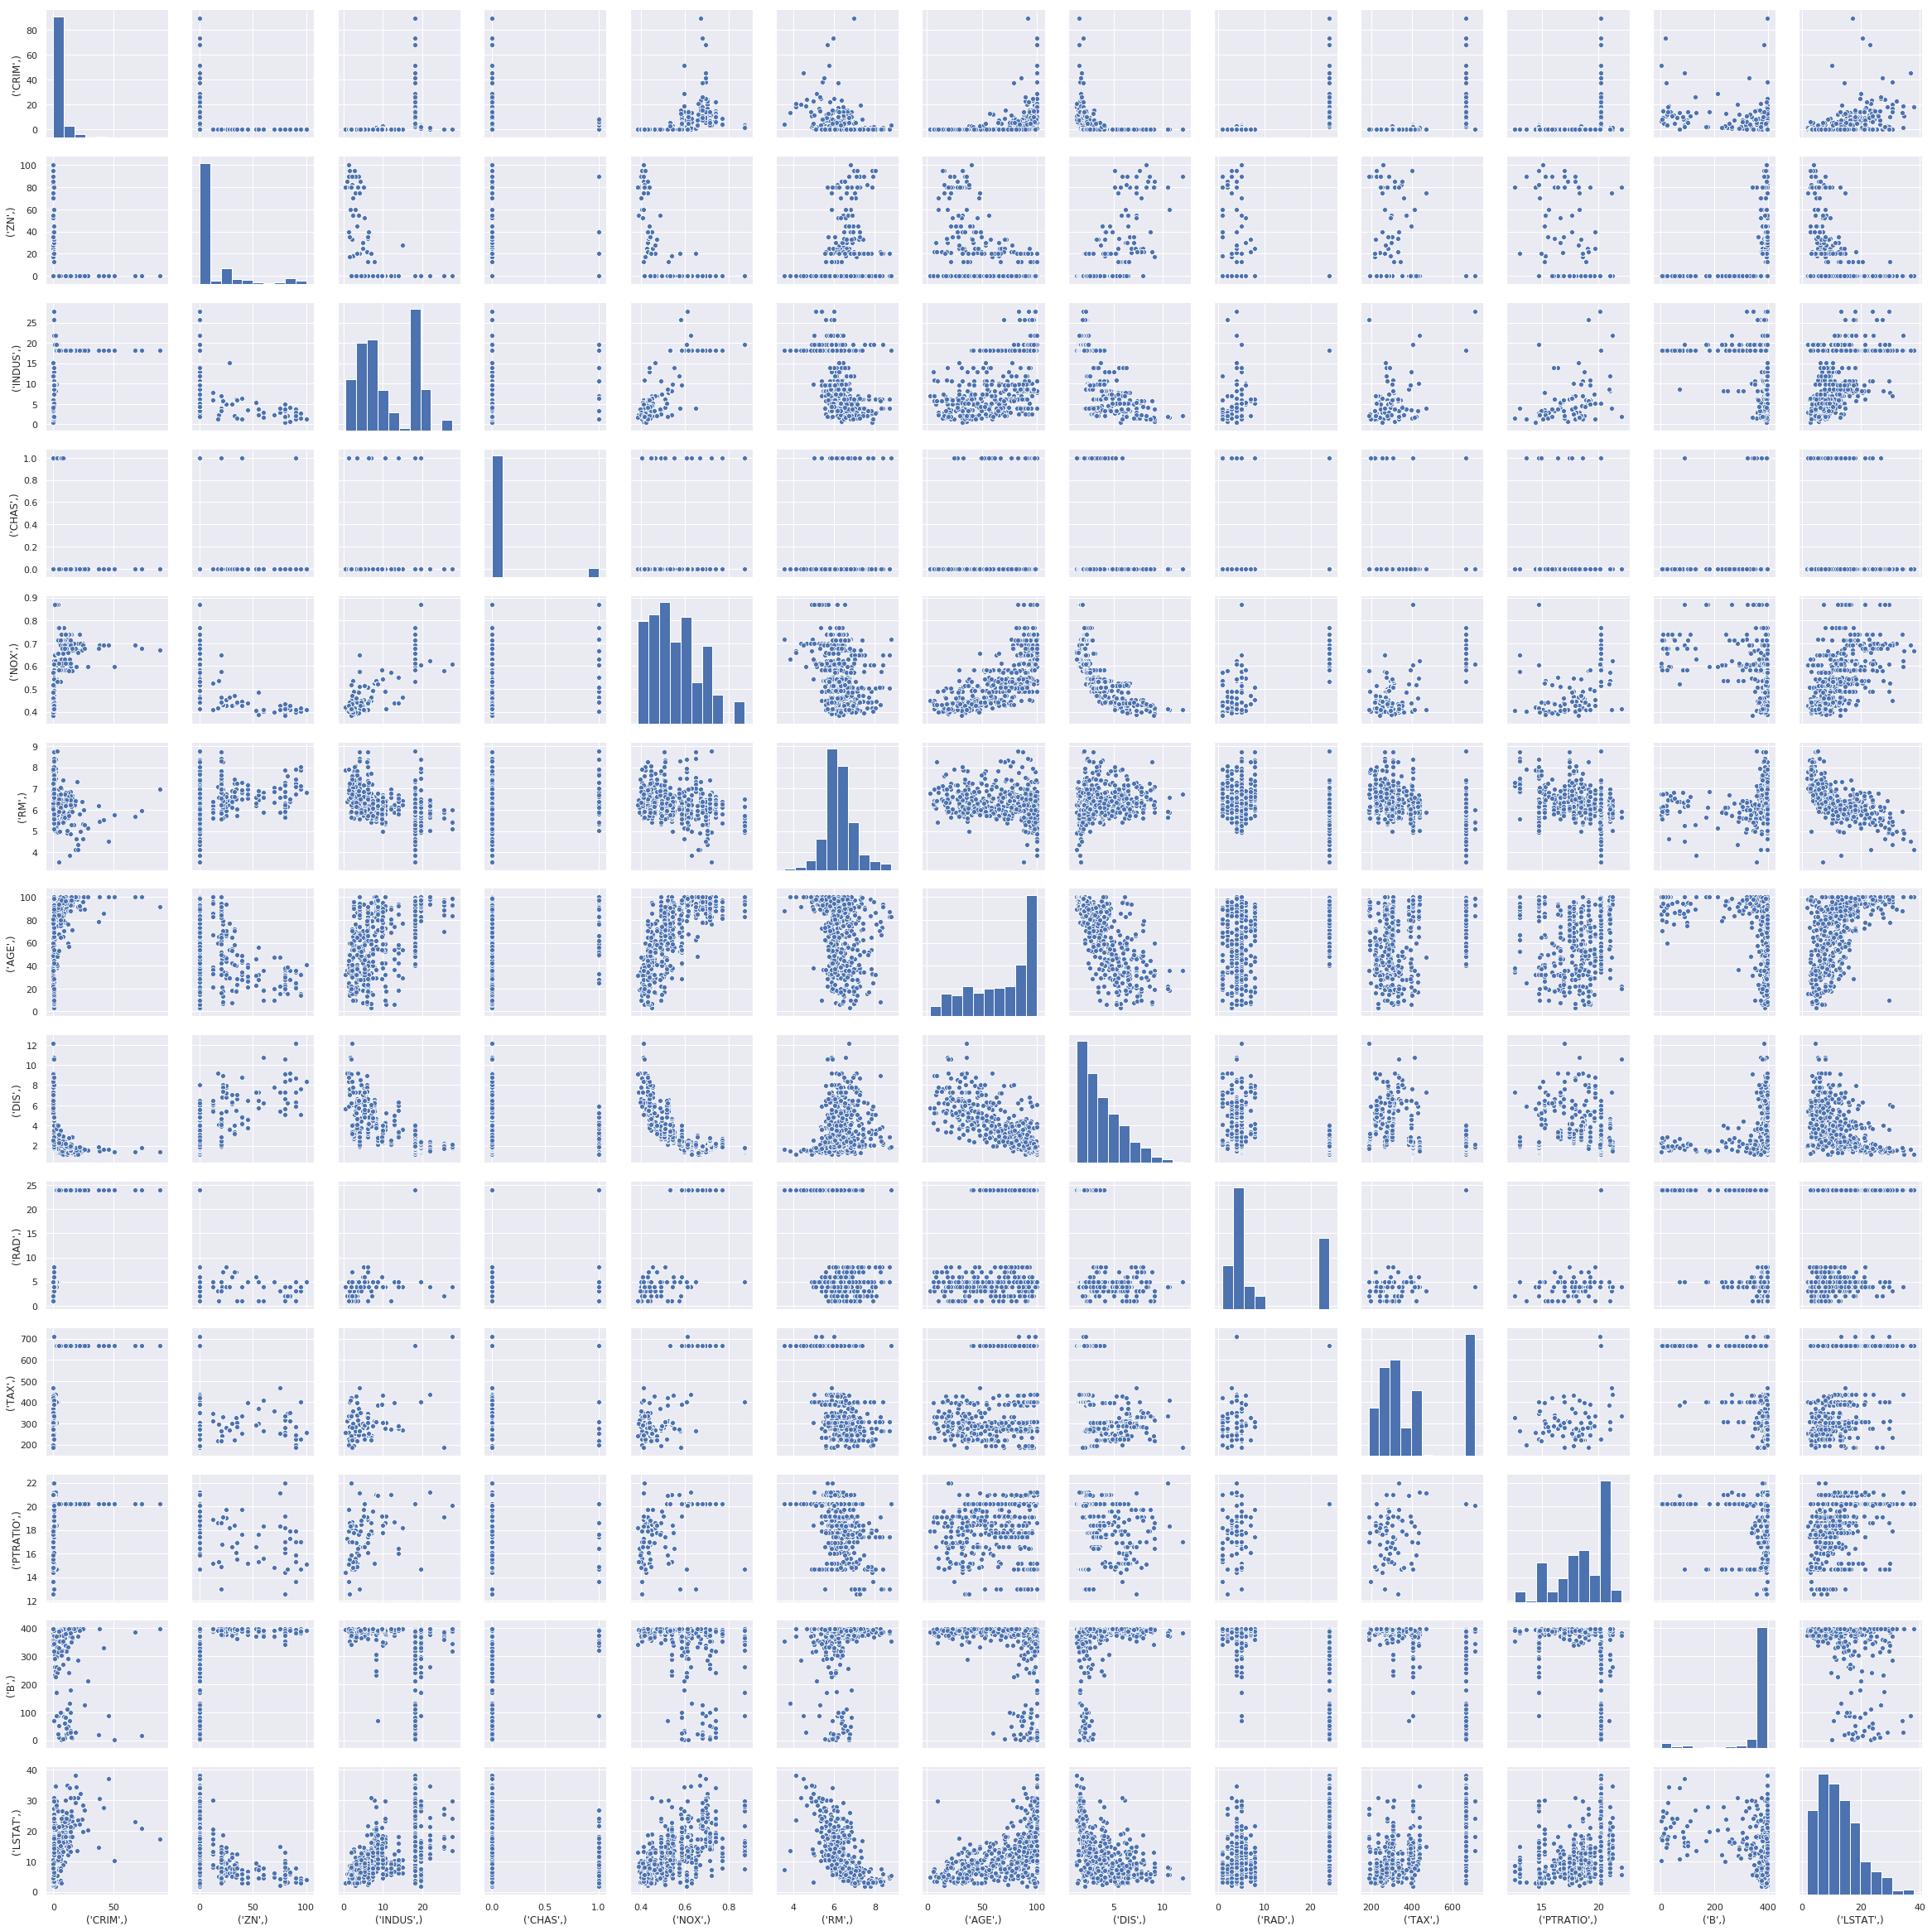

In [16]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(data=df)

Thanks for spending time and going through this notebook. In order to make this notebook, I relied heavily on these few blog posts and links. These are:
<br>https://mlcourse.ai
<br>https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166
<br>https://study.com/academy/lesson/interquartile-range-definition-formula-example.html
<br>Please go through these if you need any more help. :)